In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import networkx as nx
import sys
import os
import pandas as pd
import spycon

#https://github.com/christiando/spycon
#requires pip install git+https://github.com/christiando/spycon
#https://github.com/pwollstadt/IDTxl
#requires pip install git+https://github.com/pwollstadt/IDTxl
import spycon_utils

from typing import Tuple

from sklearn.cluster import DBSCAN

sys.path.append("..")
from analysis_package import maxlab_analysis as mla

In [6]:
file_path = "data/"
file_name = "div21.data.raw.h5"
well_no = 0
recording_no = 0

In [7]:
def load_data(
    path: str,
    well_no: int,
    recording_no: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    spikes = mla.load_spikes_from_file(path, well_no, recording_no)
    mapping = mla.load_mapping(path, well_no, recording_no)

    # for i in spikes.index:
    #     if spikes.loc[i, "channel"] not in mapping["channel"]:
    #         spikes.drop(i)
    spikes = spikes.loc[spikes["channel"].isin(mapping["channel"]), :]
    return spikes, mapping


spike_pd_df, mapping_pd_df = load_data(file_path + file_name,
                                        well_no,
                                        recording_no,)

display(spike_pd_df)
display(mapping_pd_df)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/div21.data.raw.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

862
862
[17  2 13 23 10  0  1  2  3 11  4 23  5  6  7  8  9  2 10 11 84  2 31 23
 12 11 10  2 13 11 36 14 36 15 16 14 16 11 10 28 29 14 17  8 48 18 16 18
 16  0  3 34 20 14 46 28 16 19 29 47  4  8 16 18 20  8 21 11 20  0 74 11
 29 22  5 23 71 38 17  6 21 14  4 34 29  6 24  0  4 25 17 27  1 26  3 28
  3  6 12  0  4 27 13 47  5 14  3 91 22 21 28 21 14 13  8  9 47 13 27 29
 30 56 14 31 25 32  2 33 32 34 33 32 18  3 19 32 72 95 26 89 27 21 35 21
 33 46 25 36 27 13 26 32 43 37 38 62  1 19 36 15 13 30 32 11  3 19 13 33
 12 15 29 39  5 22 37 47  6 10 35 12 22 40  0 31 26  3 41 45 26 36 23 37
 18 42 43 26 40 27 44  8 13 18 45  8 36 44  8 36 43 31  8 31 34 45  0 10
 18 42 23 21 15 31 18 40 43 31  0 10 41  9 19 17 27  9 33 45 43 17 69 84
 72 30 12 43 16 46 43 46 38 12 34 46 32 56 47 58 40 50 40 35 50 48 49 56
 48 49 21 50 48 49 56 75 48 50 40 80 51 53 51 52 44 53 10 43 31  6 96  2
 19 96  2 38 91 35 54 61  0 33 49 27 55 56 57 20 19 58 59  6 60 27 18 74
 41  4 26 61 59 29 14 48 11  7 62  2 21  7 

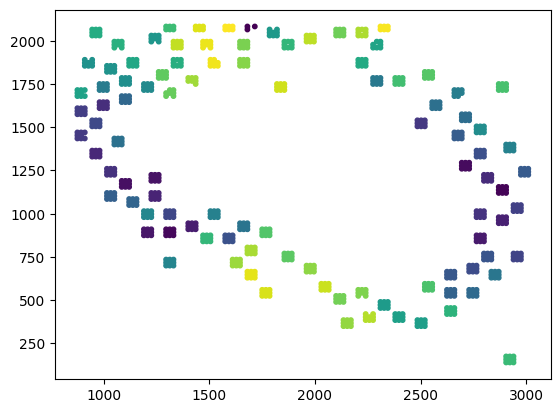

In [4]:
#Cluster points
#17.5 x sqrt(2) = 24.8
clustering = DBSCAN(eps = 25).fit(mapping_pd_df.loc[:, ["x", "y"]])
labels = clustering.labels_
mapping_pd_df["label"] = labels

print(len(mapping_pd_df))
print(len(labels))
print(labels)
print(max(labels))
print(len(mapping_pd_df.loc[:, "x"]))
plt.scatter(mapping_pd_df.loc[:, "x"], mapping_pd_df.loc[:, "y"],  s = 10, c = labels)
plt.show()


In [5]:
clustering_dict = dict()
for i, chan in enumerate(mapping_pd_df["channel"]):
    clustering_dict[chan] = labels[i]
clustering_dict
print(max(clustering_dict.values()))

98


In [6]:
mapping_pd_df_channel_replaced = mapping_pd_df.drop(["channel"], axis = 1).rename(columns = {"label": "channel"})
mapping_pd_df_channel_replaced = mapping_pd_df_channel_replaced.groupby("channel").mean().reset_index()
mapping_pd_df_channel_replaced.set_index("channel", inplace=True)
display(mapping_pd_df_channel_replaced)
spike_pd_df_channel_replaced = spike_pd_df.copy()
spike_pd_df_channel_replaced["original channel"] = spike_pd_df_channel_replaced["channel"]
spike_pd_df_channel_replaced["channel"] = spike_pd_df_channel_replaced["channel"].replace(clustering_dict)

display(spike_pd_df_channel_replaced)
spike_pd_df_channel_replaced.drop_duplicates(inplace = True, subset = ["time", "channel"])
display(spike_pd_df_channel_replaced)

print(max(spike_pd_df_channel_replaced["channel"]))


,electrode,x,y
channel,,,
-1,26203.333333,1691.666667,2076.666667
0,14465.000000,2887.500000,1137.500000
1,11295.000000,1312.500000,892.500000
2,16215.000000,2712.500000,1277.500000
3,14803.000000,1102.500000,1172.500000
...,...,...,...
94,8237.000000,1697.500000,647.500000
95,24972.500000,1487.500000,1979.687500
96,23599.375000,1520.312500,1870.312500


,time,channel,amplitude,original channel
0,-0.09920,82,-5.297205,988
1,-0.09920,82,-3.777930,993
2,-0.09920,82,-8.748223,709
3,-0.09920,82,-9.860536,841
4,-0.09915,82,-9.435249,937
...,...,...,...,...
1185766,299.91070,43,-5.682082,267
1185767,299.91070,43,-12.697094,463
1185768,299.91075,43,-6.560393,211
1185769,299.91310,39,-10.938105,815


,time,channel,amplitude,original channel
0,-0.09920,82,-5.297205,988
4,-0.09915,82,-9.435249,937
7,-0.09905,82,-13.193364,981
8,-0.09900,22,-8.859291,197
9,-0.09900,16,-13.904939,56
...,...,...,...,...
1185763,299.90990,5,-17.184206,12
1185764,299.91065,43,-9.491546,275
1185765,299.91070,43,-17.420622,255
1185768,299.91075,43,-6.560393,211


98


[-0.0992 -0.099  -0.0989 -0.0955]
(611848,)
[82 82 82 ... 43 43 39]
(611848,)


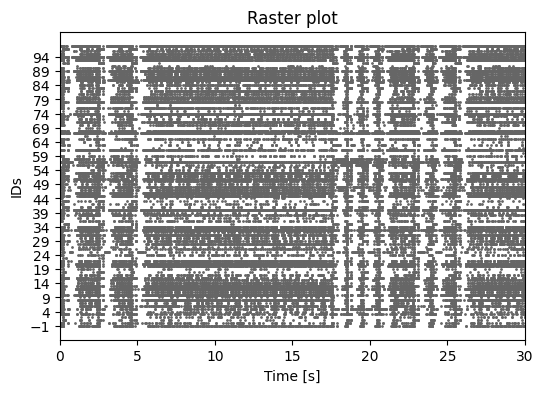

In [11]:
times = spike_pd_df_channel_replaced["time"].values
ids = spike_pd_df_channel_replaced["channel"].values
print(times[0:20:5])
print(np.shape(times))
print(ids)
print(np.shape(ids))

plt.figure(figsize = (6, 4))
plt.scatter(times, ids, s=1, c=[[.4,.4,.4]])
plt.yticks(np.unique(ids)[::5])
plt.xlim([0,30])
#plt.xticks([0,15,30])
plt.ylabel('IDs')
plt.xlabel('Time [s]')
plt.title('Raster plot')
plt.show()

In [11]:
from spycon.coninf import Smoothed_CCG
con_method = Smoothed_CCG() #This has an alpha parameter that can be changed
spycon_result = con_method.infer_connectivity(times, ids)
spycon_result.save("spycon_test_result", "data/")

 35%|███▌      | 3480/9900 [10:42<05:34, 19.20it/s]  C:\Users\mrwun\AppData\Roaming\Python\Python312\site-packages\spycon\coninf\sci_sccg.py:273: RuntimeWarning: invalid value encountered in log
  logpfast_max = numpy.log(-numpy.expm1(logpfast_max))
100%|██████████| 9900/9900 [6:43:25<00:00,  2.44s/it]       


In [12]:
spycon_result = spycon.spycon_result.load_connectivity_result("spycon_test_result", "data/")

In [13]:
print(spycon_result.nodes)
print(spycon_result.threshold)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98]
[9.39266193]


DiGraph with 100 nodes and 9900 edges
DiGraph with 100 nodes and 4739 edges


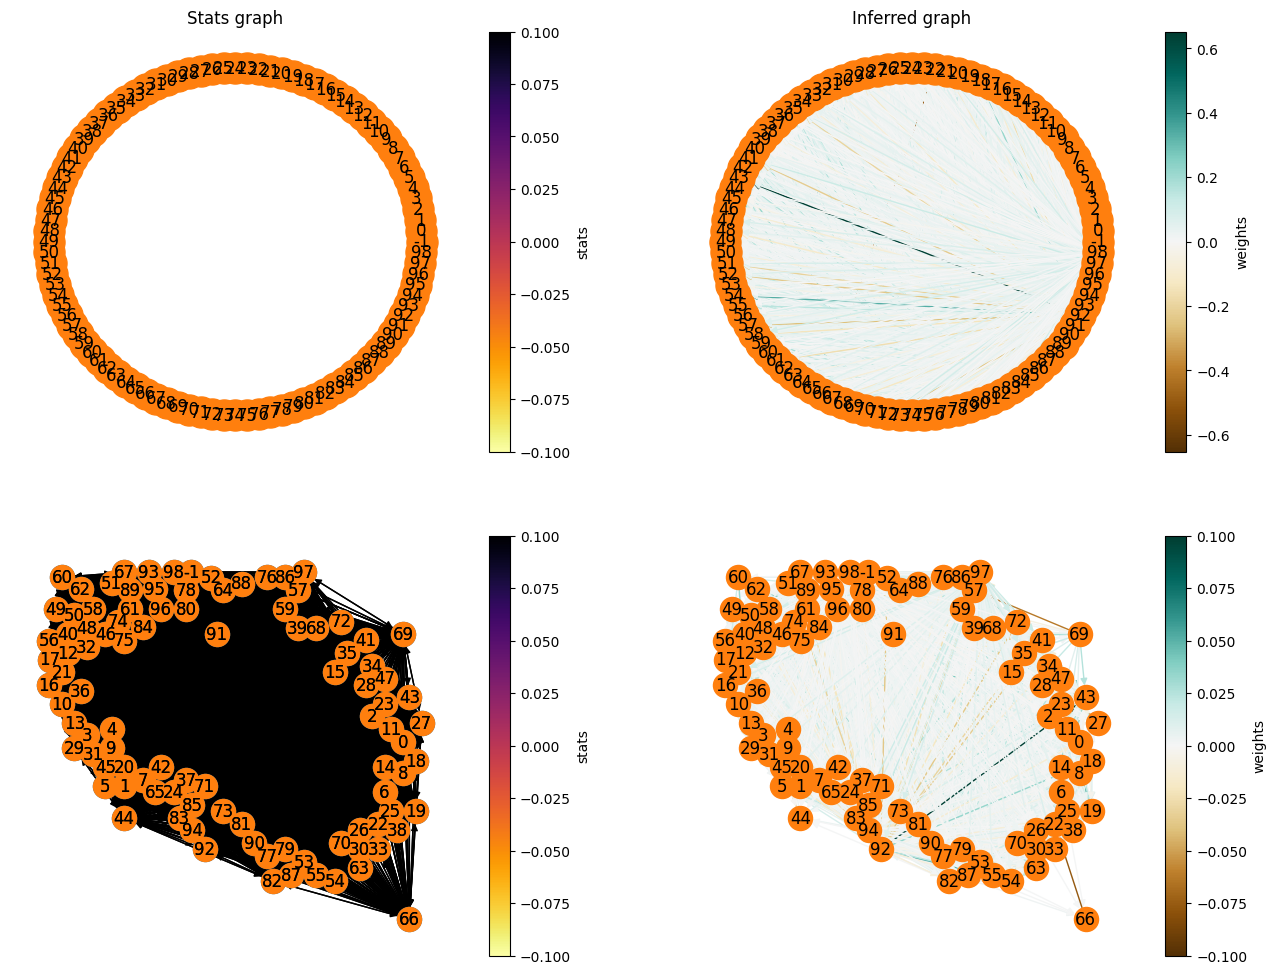

In [14]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
g1 = spycon_result.draw_graph(graph_type='stats', ax=ax1)
print(g1)
pos1 = nx.circular_layout(g1)
for i in mapping_pd_df_channel_replaced.index:
    pos1[i] = np.array(mapping_pd_df_channel_replaced.loc[i, ["x", "y"]] )

ax1.set_title('Stats graph')
ax2 = fig.add_subplot(222)
g2 = spycon_result.draw_graph(graph_type='weighted', ax=ax2)
print(g2)
pos2 = nx.circular_layout(g2)
for i in mapping_pd_df_channel_replaced.index:
    pos2[i] = np.array(mapping_pd_df_channel_replaced.loc[i, ["x", "y"]])
ax2.set_title('Inferred graph')

ax3=fig.add_subplot(223)
nx.draw(g1, pos1, with_labels=True)
cmap = plt.get_cmap("inferno_r")
weights = list(nx.get_edge_attributes(g1, "weight").values())
min_weight, max_weight = np.amin(weights), np.amax(weights)
norm = mpl.colors.Normalize(vmin=min_weight, vmax=max_weight)
nx.draw(g1, pos1, with_labels=True,
        node_color="C1",
        edge_color=weights,
        edge_vmin=min_weight,
        edge_vmax=max_weight,
        edge_cmap=cmap,
        )
plt.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax = plt.gca(), 
            label="stats",
        )

ax4=fig.add_subplot(224)
cmap = plt.get_cmap("BrBG")
weights = list(nx.get_edge_attributes(g2, "weight").values())
max_weight = np.amax(np.absolute(weights))
norm = mpl.colors.Normalize(vmin=min_weight, vmax=max_weight)
nx.draw(g2, pos2, with_labels=True,
        node_color="C1",
        edge_color=weights,
        edge_vmin=-max_weight,
        edge_vmax=max_weight,
        edge_cmap=cmap,
        )
plt.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax = plt.gca(), 
            label="weights",
        )
plt.show()

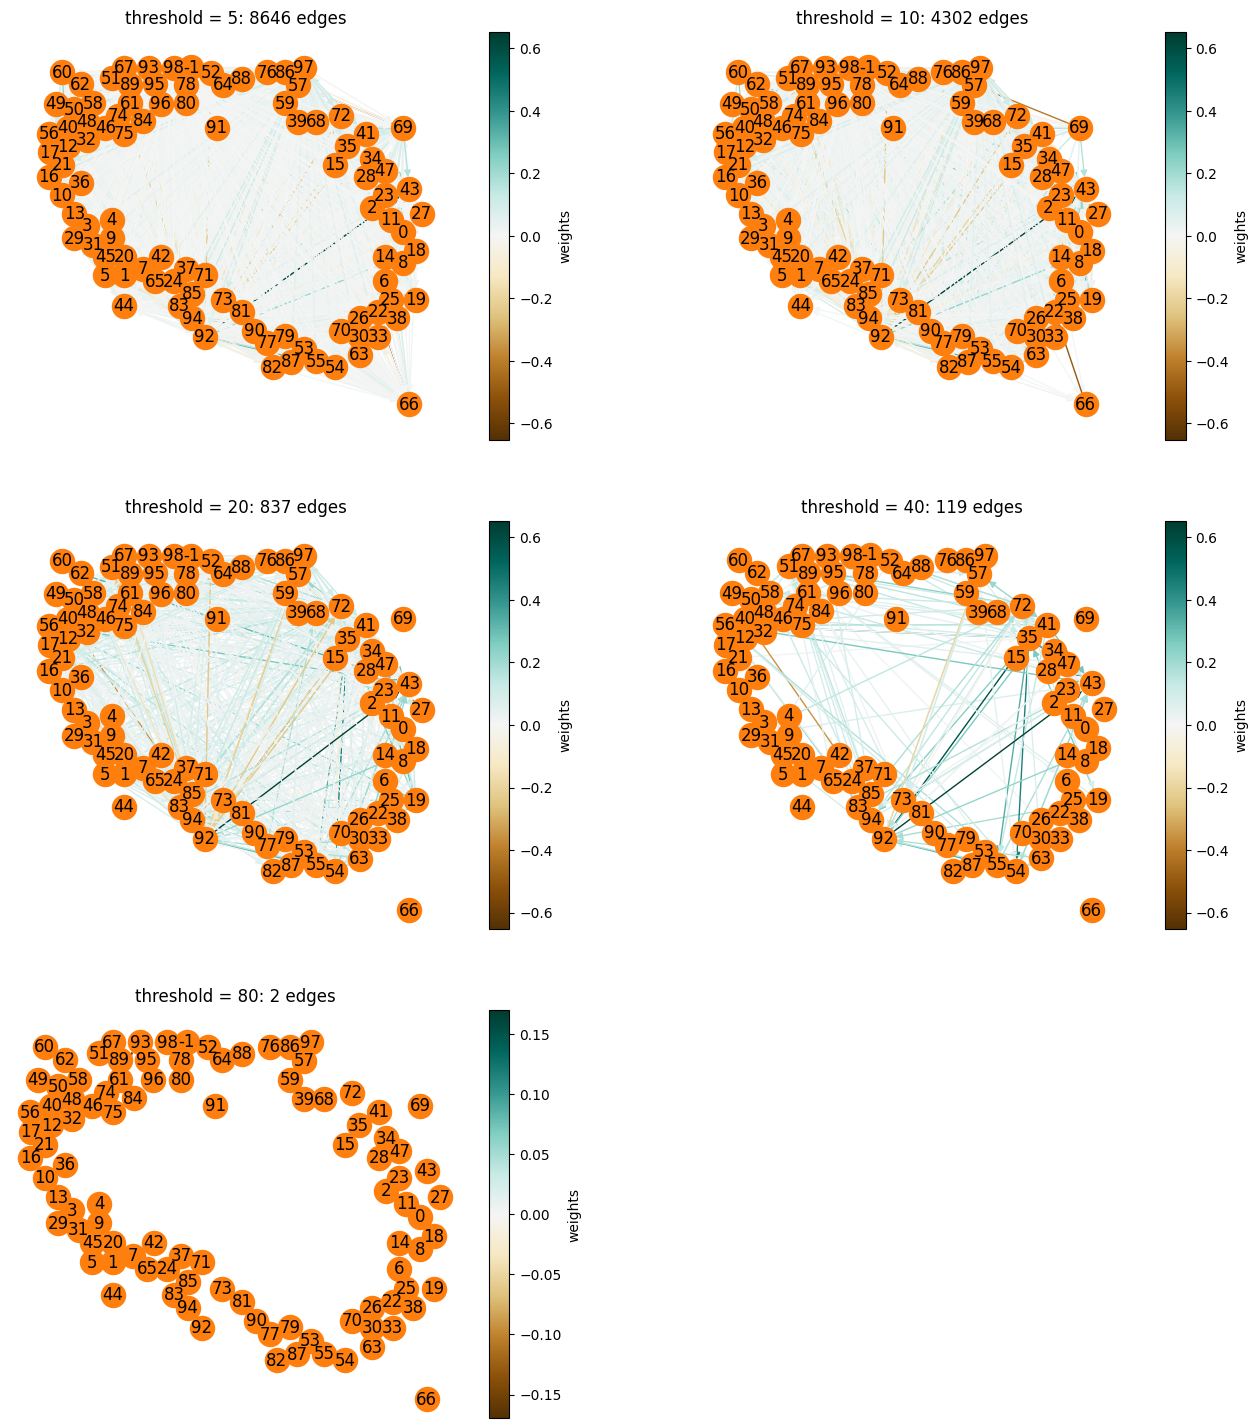

In [15]:
fig = plt.figure(figsize=(16,18))
for num, thresh in enumerate([5, 10, 20, 40, 80]):
    spycon_result.set_threshold(thresh)
    ax = plt.subplot(3, 2, num+1)
    
    g = spycon_utils.draw_graph_with_mapping(spycon_result, mapping_pd_df_channel_replaced, "weighted", ax = ax)
    plt.title("threshold = " + str(thresh) + ": " + str(len(g.edges)) + " edges")
plt.show()